In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# # taken from @ryanhoughton github repository

# from gettext import install
# import numpy as np
# import pylab as pl
# import subprocess as sp
# import uuid
# import pdb
# import os
# # get rid of annoying fits table warnings
# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     import astropy.table as ap
# import astropy.io.fits as pf

# from lvmdrp.core.constants import ROOT_PATH


# # setup slow (hard disk) and fast (RAM disk) methods, then choose one
# skycorrinstall_slow = '/home/houghton/z/data2/software/skycorr1.1.2/'
# skycorrinstall_fast = '/Volumes/RAMDisk/skycorr1.1.2/'
# skycorrinstall_fasthsim = '/mnt/ramdisk/skycorr1.1.2/'
# skycorrtmp_slow = '/tmp/'
# skycorrtmp_fast = '/Volumes/RAMDisk/tmp/'
# skycorrtmp_fasthsim = '/mnt/ramdisk/tmp/'

# skycorrinstall = os.path.join(ROOT_PATH, "lib", "skycorr")+"/" #skycorrinstall_fast#hsim #_slow #
# skycorrtmp =  os.path.join(skycorrinstall, "tmp") #skycorrtmp_fast#hsim #_slow #


# def createParFile(objfile, skyfile, outfile, outdir='./', parfile=None, \
#                   colnames=[None, None, None, None], \
#                   install=skycorrinstall, defaultError=0.01, \
#                   wave2Micron=1.0, vacOrAir='vac', dateKey='MJD-OBS', timeKey="TM-START",\
#                   telAltKey='ESO TEL ALT', timeVal=None, dateVal=None, telAltVal=None, \
#                   linetab='airglow_groups.dat', vardat='airglow_var.dat',\
#                   soldaturl="ftp.geolab.nrcan.gc.ca/data/solar_flux/monthly_averages", \
#                   solflux=-1, fwhm=5.0, varfwhm=1, ltol=1e-2, minLineDist=2.5, fluxLim=-1, \
#                   ftol=1e-3, xtol=1e-3, wtol=1e-3, chebyMax=7, chebyMin=3, chebyConst=0.0, \
#                   rebinType=1, weightLim=0.67, sigLim=15.0, fitLim=0.0, plotType="N"):
#     """
#     RH 18/11/15

#     Script to create a Skycorr1.1.2 parameter file, given various input files

#     vacOrAir:   vac/air
#     dateKey:   MJD-OBS / DATE_VAL
#     timeKey:   TM-START / TIME_VAL
#     telAltKey: ESO TEL ALT / TELALT_VAL
#     VARFWHM:    0 / 1 
#     FLUXLIM:    -1 or cut value
#     PLOT_TYPE:  W / X / N
    
#     """

#     # create output parfilename
#     if parfile==None:
#         parfile = objfile[0:objfile.rfind(".fits")]+".skycorr.par"

#     # open file handler
#     fp = open(parfile, "w")
#     # start writing info
#     fp.write("\n")
#     # dir and files
#     fp.write("\nINST_DIR="+install)              # install dir
#     fp.write("\nINPUT_OBJECT_SPECTRUM="+objfile) # object spectrum 
#     fp.write("\nINPUT_SKY_SPECTRUM="+skyfile)    # sky spectrum
#     fp.write("\nOUTPUT_DIR="+outdir)             # output dir
#     fp.write("\nOUTPUT_NAME="+outfile)           # corrected object spectrum
#     # input structure
#     # generate colnames
#     ncolnames = len(colnames)
#     if ncolnames>4: raise ValueError('Colnames must have no more than 4 elements')
#     if ncolnames<4:
#         nnone=4-ncolnames
#         extra = [str(None).upper() for x in range(nnone)]
#         colnames.extend(extra)
#     if len(colnames)!=4: raise ValueError("This should never happen")
#     cns=''
#     for cn in colnames:
#         cns=cns+str(cn)+" "
#     fp.write("\nCOL_NAMES="+cns)
#     fp.write("\nDEFAULT_ERROR="+str(defaultError))
#     fp.write("\nWLG_TO_MICRON="+str(wave2Micron))
#     fp.write("\nVAC_AIR="+vacOrAir)

#     # expert mode
#     if (dateVal!=None):
#         if dateVal==None: raise ValueError("Must give dateVal if dateKey=DATE_VAL")
#         fp.write("\nDATE_KEY=DATE_VAL")
#         fp.write("\nDATE_VAL="+str(dateVal))
#     else:
#         fp.write("\nDATE_KEY="+dateKey)
        
#     if timeVal!=None:
#         if timeVal==None: raise ValueError("Must give timeVal if timeKey=TIME_VAL")
#         fp.write("\nTIME_KEY=TIME_VAL")
#         fp.write("\nTIME_VAL="+str(timeVal))
#     else:
#         fp.write("\nTIME_KEY="+timeKey)
        
#     if telAltVal!=None:
#         if telAltVal==None: raise ValueError("Must give telAltVal if telAltKey=TELALT_VAL")
#         fp.write("\nTELALT_KEY=TELALT_VAL")
#         fp.write("\nTELALT_VAL="+str(telAltVal))
#     else:
#         fp.write("\nTELALT_KEY="+telAltKey)

#     # required
#     fp.write("\nLINETABNAME="+linetab)
#     fp.write("\nVARDATNAME="+vardat)
#     fp.write("\nSOLDATURL="+soldaturl)
#     fp.write("\nSOLFLUX="+str(solflux))

#     # line id
#     fp.write("\nFWHM="+str(fwhm))
#     fp.write("\nVARFWHM="+str(varfwhm))
#     fp.write("\nLTOL="+str(ltol))
#     fp.write("\nMIN_LINE_DIST="+str(minLineDist))
#     fp.write("\nFLUXLIM="+str(fluxLim))

#     # fitting
#     fp.write("\nFTOL="+str(ftol))
#     fp.write("\nXTOL="+str(xtol))
#     fp.write("\nWTOL="+str(wtol))
#     fp.write("\nCHEBY_MAX="+str(chebyMax))
#     fp.write("\nCHEBY_MIN="+str(chebyMin))
#     fp.write("\nCHEBY_CONST="+str(chebyConst))
#     fp.write("\nREBINTYPE="+str(rebinType))
#     fp.write("\nWEIGHTLIM="+str(weightLim))
#     fp.write("\nSIGLIM="+str(sigLim))
#     fp.write("\nFITLIM="+str(fitLim))
#     # plotting
#     fp.write("\nPLOT_TYPE="+plotType)
    
#     fp.write("\n")
#     fp.close()

#     return parfile


# def runSkyCorr(parfile, installdir=skycorrinstall, bin="bin/skycorr"):
#     """
#     RH 19/11/15

#     Wrapper for running the skycorr exec from the command line

#     """

#     FNULL = open(os.devnull, 'w')
#     sp.call([installdir+bin, parfile], stdout=FNULL, stderr=FNULL)
#     FNULL.close()


# def fitstabSkyCorrWrapper(wave, objflux, skyflux, dateVal, timeVal, telAltVal, tmp=skycorrtmp):
#     """
#     RH 19/11/15

#     Given wave and flux numpy arrays, create FITS files and run skycorr on them

#     """

#     dirname = tmp+"skycorr"+str(uuid.uuid4())+"/"
#     objfile = dirname+"OBJ"+str(uuid.uuid4())+".txt"
#     skyfile = dirname+"SKY"+str(uuid.uuid4())+".txt"
#     outfile = "OUT"+str(uuid.uuid4())

#     sp.call(["mkdir", dirname])
#     objtab = ap.Table()
#     objtab.add_column('lambda', wave)
#     objtab.add_column('flux', objflux)
#     objtab.table_name="Obj"
#     objtab.write(objfile, type="fits", verbose=False)
    
#     ot = pf.open(objfile)
#     ot[1].header['MJD-OBS']=dateVal
#     ot[1].header['TM-START']=timeVal
#     ot[1].header['ESO TEL ALT']=telAltVal
#     ot.writeto(objfile, clobber=True)
#     ot.close()
    
#     skytab = ap.Table()
#     skytab.add_column('lambda', wave)
#     skytab.add_column('flux', skyflux)
#     skytab.table_name="Sky"
#     skytab.write(objfile, type="fits", verbose=False)

#     st = pf.open(skyfile)
#     st[1].header['MJD-OBS']=dateVal
#     st[1].header['TM-START']=timeVal
#     st[1].header['ESO TEL ALT']=telAltVal
#     st.writeto(skyfile, clobber=True)
#     st.close()

#     # colnames = ["lambda", "flux"]
#     # parfile = createParFile(objfile, skyfile, outfile, outdir=dirname, colnames=colnames)
#     # runSkyCorr(parfile)
#     # raise ValueError("Incomplete Code")

#     return objfile, skyfile


# def asciiSkyCorrWrapper(wave, objflux, skyflux, dateVal, timeVal, telAltVal, mask=None, tmp=skycorrtmp, \
#                         defaultError=0.01, wave2Micron=1.0, vacOrAir='vac', \
#                         linetab='airglow_groups.dat', vardat='airglow_var.dat',\
#                         soldaturl="ftp.geolab.nrcan.gc.ca/data/solar_flux/monthly_averages", \
#                         solflux=-1, fwhm=5.0, varfwhm=1, ltol=1e-2, minLineDist=2.5, fluxLim=-1, \
#                         ftol=1e-3, xtol=1e-3, wtol=1e-3, chebyMax=7, chebyMin=3, chebyConst=0.0, \
#                         rebinType=1, weightLim=0.67, sigLim=15.0, fitLim=0.0, plotType="N", \
#                         calcNewWave=True, cleanTmp=True, cleanAqua=False):
#     """
#     RH 19/11/15

#     Given wave and flux numpy arrays, create an ascii files and run skycorr on them
    
#     """

#     dirname = tmp+"skycorr"+str(uuid.uuid4())+"/"
#     objfile = dirname+"OBJ"+str(uuid.uuid4())+".txt"
#     skyfile = dirname+"SKY"+str(uuid.uuid4())+".txt"
#     outfile = "OUT"+str(uuid.uuid4())
#     newfile = dirname+outfile+"_fit.fits"
#     if calcNewWave: resFile = outfile+"_fit.res"

#     # do some simple checks...
#     # no nans
#     good = np.where(np.isfinite(wave) & np.isfinite(objflux) & np.isfinite(skyflux))
#     wave = wave[good]
#     objflux = objflux[good]
#     skyflux = skyflux[good]
#     if type(mask)!=type(None): mask = mask[good]
        
#     # wave is sorted (monotonically increasing?)
#     sw = wave.argsort()
#     wave = wave[sw]
#     objflux = objflux[sw]
#     skyflux = skyflux[sw]
#     if type(mask)!=type(None): mask    = mask[sw]

#     # now make the ascii files
#     sp.call(["mkdir", dirname])
#     if type(mask)!=type(None):
#         np.savetxt(objfile, np.array([wave,objflux,mask]).T)
#         np.savetxt(skyfile, np.array([wave,skyflux,mask]).T)
#         colnames = ["lambda", "flux", "NONE", "mask"]
#     else:
#         np.savetxt(objfile, np.array([wave,objflux]).T)
#         np.savetxt(skyfile, np.array([wave,skyflux]).T)
#         colnames = ["lambda", "flux"]
        
#     # create the par file
#     parfile = createParFile(objfile, skyfile, outfile, outdir=dirname, colnames=colnames,\
#                             dateVal=dateVal, timeVal=timeVal, telAltVal=telAltVal, \
#                             defaultError=defaultError, wave2Micron=wave2Micron, vacOrAir=vacOrAir, \
#                             linetab=linetab, vardat=vardat,soldaturl=soldaturl, \
#                             solflux=solflux, fwhm=fwhm, varfwhm=varfwhm, ltol=ltol, minLineDist=minLineDist, fluxLim=fluxLim, \
#                             ftol=ftol, xtol=xtol, wtol=wtol, chebyMax=chebyMax, chebyMin=chebyMin, chebyConst=chebyConst, \
#                             rebinType=rebinType, weightLim=weightLim, sigLim=sigLim, fitLim=fitLim, plotType=plotType)
#     # run skycor
#     runSkyCorr(parfile)

#     # collect results
#     try:
#         results = ap.Table()
#         results.read(newfile, type='fits', verbose=False)
#     except:
#         #print "Failed to open skycorr results...."
#         #pdb.set_trace()
#         results=None
#         #pdb.set_trace()

#     # get new wave axis if asked
#     if calcNewWave & (type(results)!=type(None)):
#         coefs = readWaveInfo(dirname, resFile)
#         if coefs!=None:
#             x = 2.0*(wave-wave.min())/(wave.max()-wave.min()) - 1.0
#             newx = cheby(x,coefs)
#             newwave = 0.5*(newx + 1.0)*(wave.max()-wave.min())+wave.min()
#         else:
#             newwave = wave
#         results.add_column('lambda_new', newwave)

#     if cleanTmp:# & (type(results)!=type(None)):
#         sp.call(["rm", "-rf", dirname])

#     if cleanAqua:
#         # REALLY NASTY hack, but I'm going mad with all the aquaterms being left open
#         FNULL = open(os.devnull, "w")
#         sp.call(["ps aux | grep AquaTerm.app | grep -v grep | awk '{print $2}' | xargs kill"], shell=True, stdout=FNULL, stderr=FNULL)
#         FNULL.close()

#     return results


# def readWaveInfo(dir, resFile, verbose=False):
#     """
#     RH 20/11/15

#     Helper function to read in the (recalibrated) wavelength info in the skycorr RES file.

#     """

#     waveFile = "WAVEINFO_"+resFile # init
#     # extract wave info from res file
#     fp = open(dir+waveFile, "w")
#     cat = sp.Popen(('cat', dir+resFile), stdout=sp.PIPE)
#     sp.call(('grep', '^w'), stdin=cat.stdout, stdout=fp)
#     cat.wait()
#     fp.close()
#     # read in wave info
#     fp2=open(dir+waveFile, "r")
#     info= []
#     for line in fp2:
#         info.append(line.split())
#     if len(info)==0:
#         if verbose: print("WARNING: no wave info found!")
#         coefs = None
#     else:
#         # extract cheby coefs, sorted
#         info = np.array(info)
#         sa = info[:,1].argsort()
#         coefs = np.array(info[sa,3],dtype=np.float)

#     fp2.close()
    
#     return coefs


# def cheby(x, coefs, autonorm=True):
#     """
#     RH 20/11/15

#     Generate Chebyshev Polynomials of the first kind, multiplied by a coefficient array and summed.
#     AUTONORM makes sure that we evaluate the Chebys with x normalised between -1 and 1

#     """

#     # autonorm x array
#     if autonorm:
#         xmin = x.min()
#         xmax = x.max()
#         xx   = 2.0*(x-xmin)/(xmax-xmin) - 1.0
#     else:
#         xx=x

#     # check I'm doing what i think I'm doing
#     if len(coefs.shape) > 1:
#         raise IOError("Array of coeffients has more than one dimension?")

#     # shortcut using numpy
#     poly = np.polynomial.chebyshev.chebval(xx,coefs)
    
#     return poly

    
# def test1():
#     """
#     RH 19/11/15

#     Test this code by running the standard skycorr example

#     """
#     # don't run this on RAM disk as we delete examples to save space!
#     installdir = skycorrinstall#"/Volumes/Data3/rcwh/data2/software/skycorr1.1.2/"
#     print(installdir)
#     parfile = createParFile(installdir+"examples/data/sky_sinfo_1.fits", \
#                             installdir+"examples/data/sky_sinfo_2.fits", \
#                             "TEST-SINFO-H", outdir='output', colnames=["lambda", "flux"])
#     print(parfile)
#     runSkyCorr(parfile)


# def test2(objfile="examples/data/sky_sinfo_1.fits", skyfile="examples/data/sky_sinfo_2.fits", \
#           installdir="/Volumes/Data3/rcwh/data2/software/skycorr1.1.2/", calcNewWave=False):
#     """
#     RH 19/11/15

#     Test the ascii part

#     DONT RUN ON RAM DISK AS WE DELETE EXAMPLES TO SAVE SPACE

#     """

#     otab = ap.Table()
#     otab.read(objfile, type="fits", verbose=False)
#     stab = ap.Table()
#     stab.read(skyfile, type="fits", verbose=False)

#     ofh = pf.open(objfile)
#     hdr = ofh[1].header
#     dateVal=hdr['MJD-OBS']
#     timeVal=hdr['TM-START']
#     telAltVal=hdr['ESO TEL ALT']

#     ofh.close()
    
#     results = asciiSkyCorrWrapper(otab['lambda'], otab['flux'], stab['flux'], dateVal, timeVal, telAltVal, calcNewWave=calcNewWave)


#     print('Test successful!')


In [3]:
# test1()

In [4]:
!cat /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/examples/data/sky_sinfo_1.skycorr.par



INST_DIR=/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/
INPUT_OBJECT_SPECTRUM=/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/examples/data/sky_sinfo_1.fits
INPUT_SKY_SPECTRUM=/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/examples/data/sky_sinfo_2.fits
OUTPUT_DIR=output
OUTPUT_NAME=TEST-SINFO-H
COL_NAMES=lambda flux NONE NONE 
DEFAULT_ERROR=0.01
WLG_TO_MICRON=1.0
VAC_AIR=vac
DATE_KEY=MJD-OBS
TIME_KEY=TM-START
TELALT_KEY=ESO TEL ALT
LINETABNAME=airglow_groups.dat
VARDATNAME=airglow_var.dat
SOLDATURL=ftp.geolab.nrcan.gc.ca/data/solar_flux/monthly_averages
SOLFLUX=-1
FWHM=5.0
VARFWHM=1
LTOL=0.01
MIN_LINE_DIST=2.5
FLUXLIM=-1
FTOL=0.001
XTOL=0.001
WTOL=0.001
CHEBY_MAX=7
CHEBY_MIN=3
CHEBY_CONST=0.0
REBINTYPE=1
WEIGHTLIM=0.67
SIGLIM=15.0
FITLIM=0.0
PLOT_TYPE=N


In [5]:
from astropy.io import fits

sky_fits = fits.open(
    "/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/examples/data/sky_sinfo_1.fits")

sci_fits = fits.open(
    "/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/examples/data/sky_sinfo_1.fits")

wl = sci_fits[1].data["lambda"]
sci_rss = np.atleast_2d(sci_fits[1].data["flux"])
sky_rss = np.atleast_2d(sky_fits[1].data["flux"])


In [6]:
# import yaml


# yaml.load??

In [7]:
# from astropy.table import Table


# t = Table()

# t.write.list_formats()

In [8]:
# sci_fits[1].header

In [9]:
from lvmdrp.core.sky import run_skycorr
from lvmdrp.core.constants import SKYCORR_CONFIG_PATH

config, config_name = run_skycorr(config_file=SKYCORR_CONFIG_PATH, wl=wl, sci_rss=sci_rss,
sky_rss=sky_rss, metadata={"MJD": sci_fits[1].header["MJD-OBS"], "TIME": sci_fits[1].header["TM-START"], "TELALT": sci_fits[1].header["ESO TEL ALT"]})


/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/tmp/skycorr48d250b3-1f96-46fc-80de-165046c86deb/
[ INFO  ] Skycorr 1.1.2
[ INFO  ] Using parameter file: /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/tmp/skycorr48d250b3-1f96-46fc-80de-165046c86deb/OBJ66953cd8-d51f-4873-ba53-a5281d21a745.skycorr.par
[ INFO  ] Input science data file: /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/tmp/skycorr48d250b3-1f96-46fc-80de-165046c86deb/OBJ66953cd8-d51f-4873-ba53-a5281d21a745.fits
[ INFO  ] Convert input science data file into /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/OBJ66953cd8-d51f-4873-ba53-a5281d21a745_out_0.fits_sci.fits
[ INFO  ] Read /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/OBJ66953cd8-d51f-4873-ba53-a5281d21a745_out_0.fits_sci.fits
[ INFO  ] Input sky data file: /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/tmp/skycorr48d250b3-1f96-46fc-80de-165046c86deb/SKYc1129d33-8d8e-41b2-bd0f-8280b989a942.fits
[ INFO  ] Convert input sky dat

[ INFO  ] Fitting ...
[ INFO  ] Input wavelength grid (no fit)
[ INFO  ] bestnorm: 0.000e+00
[ INFO  ] Chebyshev polynomial of degree 1
[ INFO  ] bestnorm: 0.000e+00
[ INFO  ] Chebyshev polynomial of degree 2
[ INFO  ] bestnorm: 0.000e+00
[ INFO  ] Chebyshev polynomial of degree 3
[ INFO  ] bestnorm: 0.000e+00
[ INFO  ] STOP -> No wavegrid correction
[ INFO  ] FIT RESULTS:
[ INFO  ] status: 4
[ INFO  ] npar: 79
[ INFO  ] npix: 1921
[ INFO  ] niter: 7
[ INFO  ] nfev: 17
[ INFO  ] fittime: 0.08 s
[ INFO  ] orignorm: 0.000e+00
[ INFO  ] bestnorm: 0.000e+00
[ INFO  ] Write fit results into output folder /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/
[ INFO  ] Corrected input science data file: /disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/OBJ66953cd8-d51f-4873-ba53-a5281d21a745_SC.fits
[ INFO  ] Code run time: 0.261265 s
[ INFO  ] No errors occurred


sh: 1: gnuplot: not found


In [16]:
sky_sed = fits.getdata("/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/tmp/skycorr48d250b3-1f96-46fc-80de-165046c86deb/OBJ66953cd8-d51f-4873-ba53-a5281d21a745.fits", 1)
sci_sed = fits.getdata(
    "/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/tmp/skycorr48d250b3-1f96-46fc-80de-165046c86deb/SKYc1129d33-8d8e-41b2-bd0f-8280b989a942.fits", 1)
out_sed = fits.getdata(
    "/disk-a/mejia/Research/UNAM/lvm-drp/lvmdrp/lib/skycorr/OBJ66953cd8-d51f-4873-ba53-a5281d21a745_SC.fits", 1)


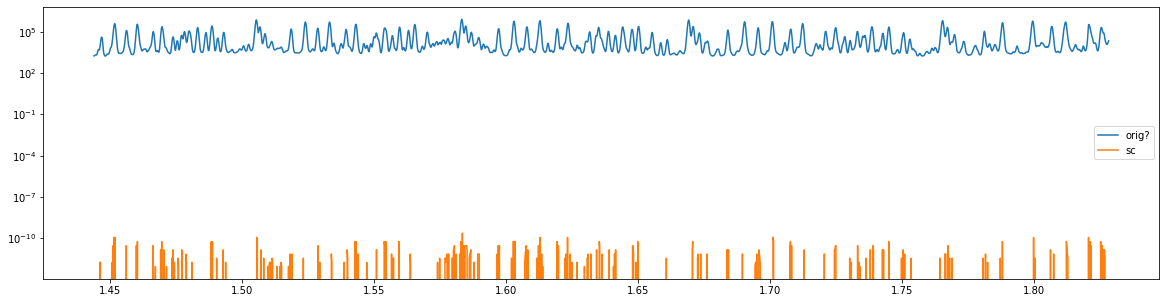

In [21]:
plt.figure(figsize=(20,5))
plt.semilogy(out_sed["lambda"], out_sed["flux"], label="orig?")
plt.semilogy(out_sed["lambda"], out_sed["scflux"], label="sc")
plt.legend()
